In [20]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [21]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [22]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [23]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [24]:
print(train)

                                image    label
0         images/train/happy/3578.jpg    happy
1        images/train/happy/16988.jpg    happy
2         images/train/happy/2666.jpg    happy
3         images/train/happy/5109.jpg    happy
4        images/train/happy/11981.jpg    happy
...                               ...      ...
28816  images/train/disgust/10112.jpg  disgust
28817  images/train/disgust/21668.jpg  disgust
28818   images/train/disgust/7049.jpg  disgust
28819   images/train/disgust/9716.jpg  disgust
28820   images/train/disgust/3561.jpg  disgust

[28821 rows x 2 columns]


In [25]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [26]:
print(test)
print(test['image'])

                              image    label
0       images/test/happy/23933.jpg    happy
1       images/test/happy/24906.jpg    happy
2       images/test/happy/18033.jpg    happy
3       images/test/happy/15271.jpg    happy
4       images/test/happy/26888.jpg    happy
...                             ...      ...
7061  images/test/disgust/20761.jpg  disgust
7062  images/test/disgust/28710.jpg  disgust
7063  images/test/disgust/23876.jpg  disgust
7064   images/test/disgust/9460.jpg  disgust
7065  images/test/disgust/35580.jpg  disgust

[7066 rows x 2 columns]
0         images/test/happy/23933.jpg
1         images/test/happy/24906.jpg
2         images/test/happy/18033.jpg
3         images/test/happy/15271.jpg
4         images/test/happy/26888.jpg
                    ...              
7061    images/test/disgust/20761.jpg
7062    images/test/disgust/28710.jpg
7063    images/test/disgust/23876.jpg
7064     images/test/disgust/9460.jpg
7065    images/test/disgust/35580.jpg
Name: image, Leng

In [27]:
from tqdm.notebook import tqdm

In [28]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [29]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [30]:
test_features =extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [31]:
x_train = train_features/255.0
x_test = test_features/255.0

In [32]:
from sklearn.preprocessing import LabelEncoder 

In [33]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [34]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [35]:
y_train = to_categorical(y_train, num_classes  = 7)
y_test = to_categorical(y_test, num_classes  = 7)

In [36]:
from tensorflow.keras.layers import Input
model = Sequential()
model.add(Input(shape=(48, 48, 1)))
# convolutional layers
model.add(Conv2D (128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D (256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D (512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D (512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
# fully connected layers
model.add(Dense (512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense (256, activation ='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense (7, activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x=x_train, y=y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.2422 - loss: 1.8240 - val_accuracy: 0.2583 - val_loss: 1.8117
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.2481 - loss: 1.8040 - val_accuracy: 0.2625 - val_loss: 1.7749
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.2872 - loss: 1.7304 - val_accuracy: 0.3646 - val_loss: 1.6417
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.3576 - loss: 1.6184 - val_accuracy: 0.4350 - val_loss: 1.4659
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.4081 - loss: 1.5158 - val_accuracy: 0.4646 - val_loss: 1.3961
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.4384 - loss: 1.4538 - val_accuracy: 0.4881 - val_loss: 1.3424
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1291s 6s/step - accuracy: 0.4607 - loss: 1.4039 - val_accuracy: 0.5040 - val_loss: 1.2916
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.4744 - loss: 1.3682 -

In [39]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [42]:
from keras.models import model_from_json

In [43]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [44]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise' ]

In [47]:
def ef(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  angry


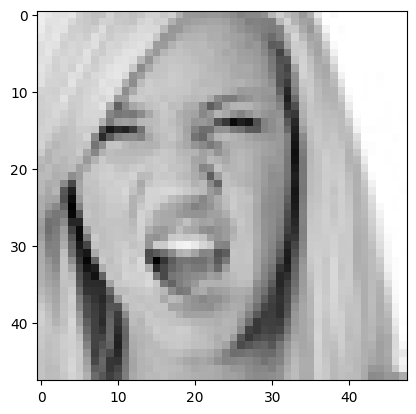

In [63]:
image = 'images/train/angry/27.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model prediction is  sad


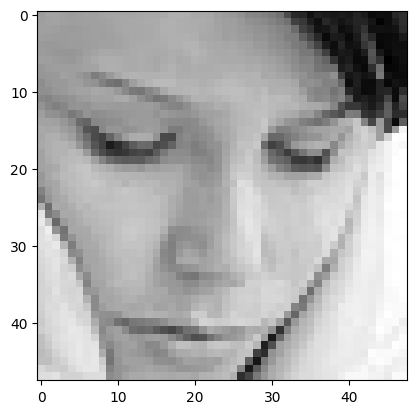

In [61]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label [pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  disgust


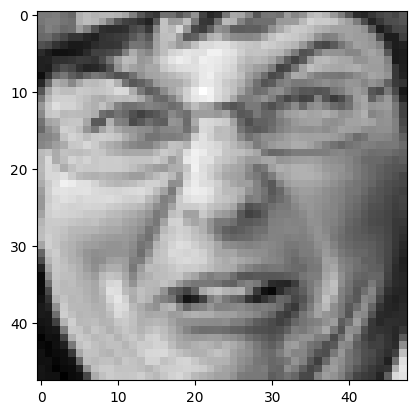

In [62]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label [pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')